In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

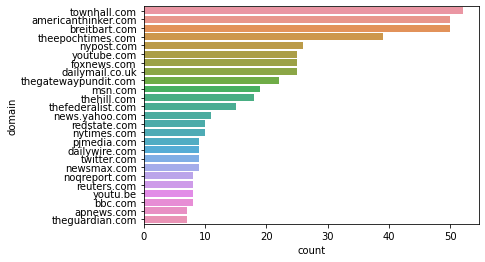

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

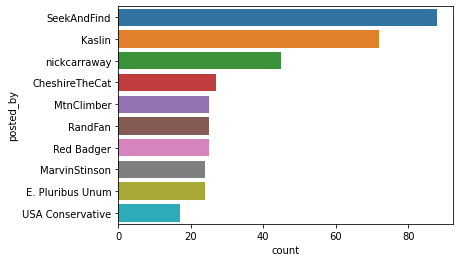

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain                                  
                                       count unique                   top freq
domain               posted_by                                                
americanthinker.com  CheshireTheCat        1      1   americanthinker.com    1
                     Kaslin               17      1   americanthinker.com   17
                     MtnClimber           16      1   americanthinker.com   16
                     SeekAndFind          11      1   americanthinker.com   11
apnews.com           SeekAndFind           1      1            apnews.com    1
                     RandFan               2      1            apnews.com    2
bbc.com              SeekAndFind           1      1               bbc.com    1
                     RandFan               2      1               bbc.com    2
                     nickcarraway          1      1               bbc.com    1
breitbart.com        CheshireTheCat        2      1         breitbart.com    2
                     MarvinStinson        19      1         breitbart.com   19
                     Red Badger            2      1         breitbart.com    2
                     USA Conservative      3      1         breitbart.com    3
dailywire.com        CheshireTheCat        1      1         dailywire.com    1
                     E. Pluribus Unum      4      1         dailywire.com    4
foxnews.com          SeekAndFind           1      1           foxnews.com    1
                     RandFan               1      1           foxnews.com    1
                     nickcarraway          1      1           foxnews.com    1
                     Red Badger            1      1           foxnews.com    1
                     USA Conservative      2      1           foxnews.com    2
                     E. Pluribus Unum      1      1           foxnews.com    1
msn.com              SeekAndFind           3      1               msn.com    3
                     nickcarraway          1      1               msn.com    1
noqreport.com        SeekAndFind           6      1         noqreport.com    6
                     E. Pluribus Unum      1      1         noqreport.com    1
nypost.com           nickcarraway         10      1            nypost.com   10
                     E. Pluribus Unum      2      1            nypost.com    2
nytimes.com          RandFan               1      1           nytimes.com    1
pjmedia.com          SeekAndFind           5      1           pjmedia.com    5
redstate.com         CheshireTheCat        1      1          redstate.com    1
                     Kaslin                1      1          redstate.com    1
                     SeekAndFind           6      1          redstate.com    6
                     E. Pluribus Unum      1      1          redstate.com    1
reuters.com          SeekAndFind           1      1           reuters.com    1
theepochtimes.com    SeekAndFind           8      1     theepochtimes.com    8
                     E. Pluribus Unum      5      1     theepochtimes.com    5
thefederalist.com    Kaslin               11      1     thefederalist.com   11
                     SeekAndFind           3      1     thefederalist.com    3
                     E. Pluribus Unum      1      1     thefederalist.com    1
thegatewaypundit.com SeekAndFind           3      1  thegatewaypundit.com    3
                     Red Badger            1      1  thegatewaypundit.com    1
                     E. Pluribus Unum      1      1  thegatewaypundit.com    1
thehill.com          RandFan               9      1           thehill.com    9
                     MarvinStinson         1      1           thehill.com    1
townhall.com         Kaslin               41      1          townhall.com   41
                     SeekAndFind           4      1          townhall.com    4
twitter.com          RandFan               5      1           twitter.com    5
                     E. Pluribus Unum      1      1           twitter.com    1

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
Actual cost to manufacture American pick-up trucks,2021-04-05 00:03:42,185.0
